In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pickle
from sklearn.datasets import load_boston

In [72]:
df = load_boston()
data = pd.DataFrame(df.data, columns=df.feature_names)
data['price'] = df.target
data.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [50]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

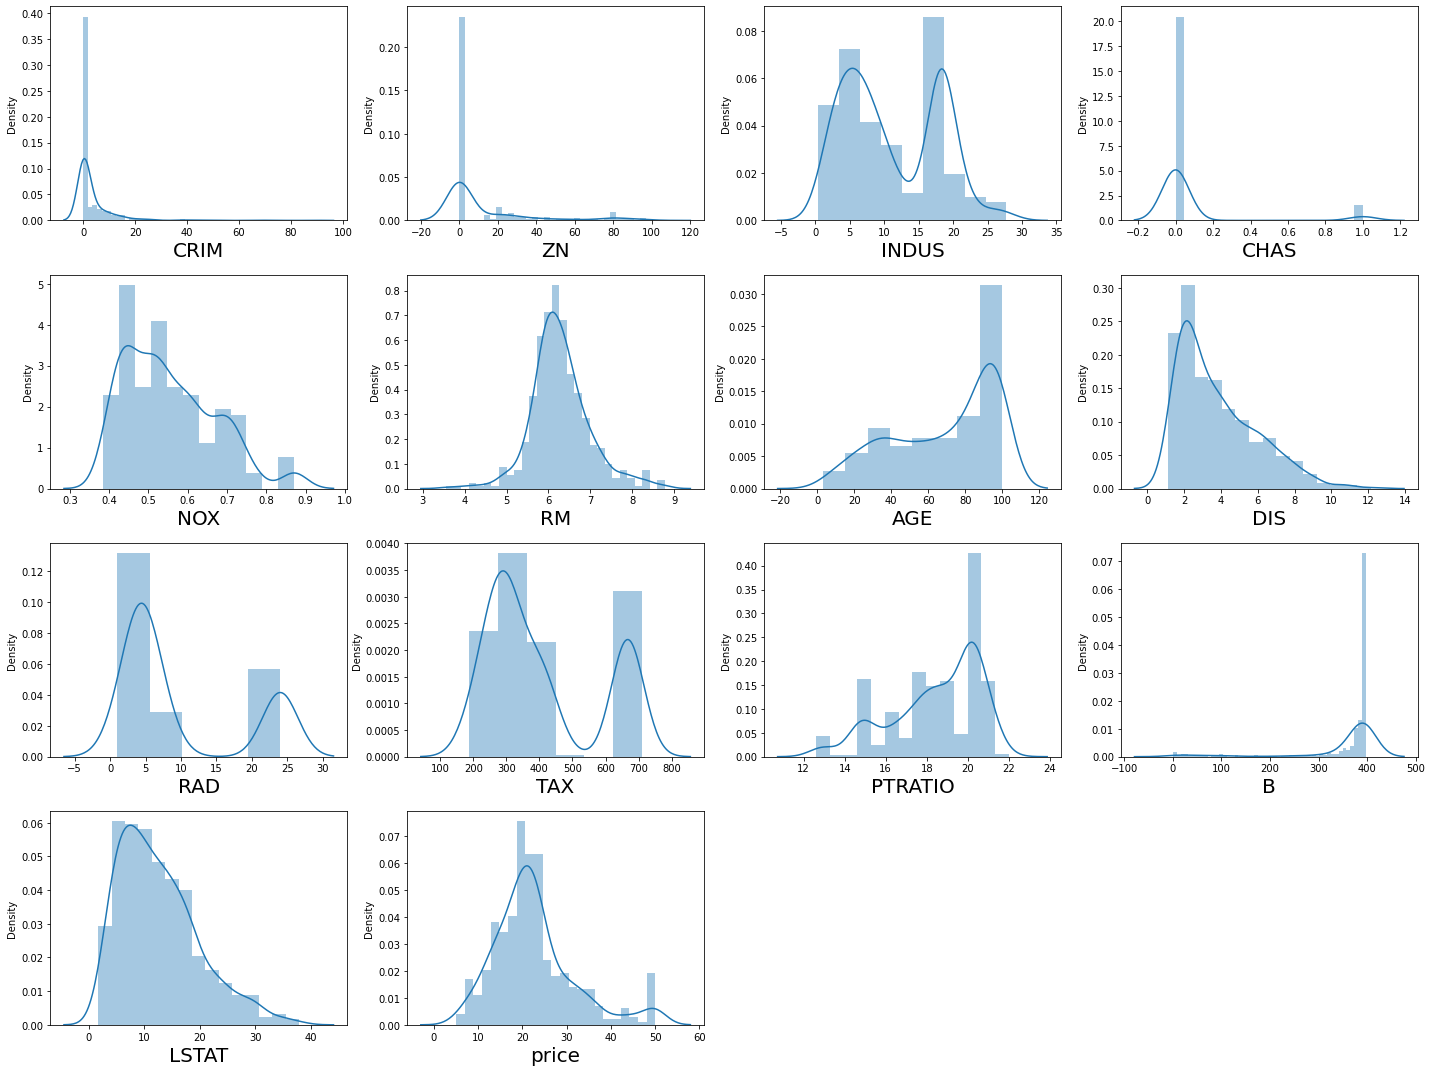

In [54]:
plt.figure(figsize=(20, 15), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# **Linera Regression:**

## **Without Scaled Data:**

In [73]:
X = data.drop(axis=1, columns=['price'])
Y = data['price']

# train_test_split:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=155)


# Model building:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)


# Check the R_Square value based on test data:
y_predict_for_test = regression_model.predict(x_test)
r2_score_test_data = r2_score(y_test, y_predict_for_test)
print(f"Accuracy For Test data (R-Square):  {r2_score_test_data}")


# Check the R_Square value based on train data:
y_predict_for_train = regression_model.predict(x_train)
r2_score_train_data = r2_score(y_train, y_predict_for_train)
print(f"Accuracy For Test data (R-Square):  {r2_score_train_data}")

Accuracy For Test data (R-Square):  0.7490774965828555
Accuracy For Test data (R-Square):  0.7347004208460381


## **Scaled The Data:**

In [74]:
X = data.drop(axis=1, columns=['price'])
Y = data['price']

# train_test_split:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=155)

# Scaling Technique():
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

# Model building:
regression_model = LinearRegression()
regression_model.fit(x_train_scaled, y_train)


# Check the R_Square value based on test data:
y_predict_for_test = regression_model.predict(x_test_scaled)
r2_score_test_data = r2_score(y_test, y_predict_for_test)
print(f"Accuracy For Test data (R-Square):  {r2_score_test_data}")


# Check the R_Square value based on train data:
y_predict_for_train = regression_model.predict(x_train_scaled)
r2_score_train_data = r2_score(y_train, y_predict_for_train)
print(f"Accuracy For Test data (R-Square):  {r2_score_train_data}")

Accuracy For Test data (R-Square):  0.7490774965828554
Accuracy For Test data (R-Square):  0.7347004208460381


Accuracy For Test data (R-Square):  0.7490774965828554
Accuracy For Test data (R-Square):  0.7347004208460381


# **Ridge Regressions:**

## **Using GridSearchCV():**

In [75]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [62]:
X = data.drop(axis=1, columns=['price'])
Y = data['price']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=155)

scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)


In [63]:
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x_train_scaled, y_train)
ridge_regressor.best_params_, ridge_regressor.best_score_

({'alpha': 1e-15}, -24.95245105469281)

In [68]:
ridge = Ridge(alpha = 1e-15)
ridge.fit(x_train_scaled, y_train)

Ridge(alpha=1e-15)

In [69]:
# Check the R_Square value based on test data:

y_predict_for_test = ridge.predict(x_test_scaled)
r2_score_test_data = r2_score(y_test, y_predict_for_test)
print(f"Accuracy For Test data (R-Square):  {r2_score_test_data}")


# Check the R_Square value based on train data:

y_predict_for_train = ridge.predict(x_train_scaled)
r2_score_train_data = r2_score(y_train, y_predict_for_train)
print(f"Accuracy For Test data (R-Square):  {r2_score_train_data}")

Accuracy For Test data (R-Square):  0.7490774965828553
Accuracy For Test data (R-Square):  0.7347004208460381


## **Using RidgeCV():**

In [80]:
X = data.drop(axis=1, columns=['price'])
Y = data['price']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=155)


In [81]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)
alpha_val = ridgecv.alpha_
alpha_val

Streaming output truncated to the last 5000 lines.
Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the d

0.07005036620471805

In [82]:
alpha_val

0.07005036620471805

In [83]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)


# Check the R_Square value based on test data:

y_predict_for_test = ridge_model.predict(x_test)
r2_score_test_data = r2_score(y_test, y_predict_for_test)
print(f"Accuracy For Test data (R-Square):  {r2_score_test_data}")


# Check the R_Square value based on train data:

y_predict_for_train = ridge_model.predict(x_train)
r2_score_train_data = r2_score(y_train, y_predict_for_train)
print(f"Accuracy For Test data (R-Square):  {r2_score_train_data}")

Accuracy For Test data (R-Square):  0.7488285260562665
Accuracy For Test data (R-Square):  0.7346624510644366


# **Lasso Regression:**

In [84]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [85]:
X = data.drop(axis=1, columns=['price'])
Y = data['price']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=155)


lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


LassoCV(cv=10, max_iter=100000, normalize=True)

In [86]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.0010801528527929652

In [89]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)


# Check the R_Square value based on test data:
y_predict_for_test = lasso_reg.predict(x_test)
r2_score_test_data = r2_score(y_test, y_predict_for_test)
print(f"Accuracy For Test data (R-Square):  {r2_score_test_data}")


# Check the R_Square value based on train data:
y_predict_for_train = lasso_reg.predict(x_train)
r2_score_train_data = r2_score(y_train, y_predict_for_train)
print(f"Accuracy For Test data (R-Square):  {r2_score_train_data}")

Accuracy For Test data (R-Square):  0.7489564992317643
Accuracy For Test data (R-Square):  0.7346949741195732
